## Getting Started with Robosuite


<center><img src="media/gallery_logo.jpg" width="400" height="300"></center>

This tutorial walks through installing robosuite, spinning up a simulation, rolling out a simple policy, and exploring custom robotics manipulation tasks.

### Background
Robosuite is an open-source simulation framework developed by the Stanford Vision and Learning Lab in 2017 for research in robot learning and manipulation. It is actively maintained by the NVidia GEAR Lab, SVL, and UT Austin Robot Perception Laboratory (RPL). **Robosuite** is an open-source robot-learning toolkit built on **MuJoCo** that standardizes simulated **manipulation** research. It emerged to replace one-off simulator code with a clean, extensible stack where robots, controllers, sensors, and tasks are modular “lego blocks.” By giving everyone the same environments, physics engine, and interfaces, robosuite makes results easier to reproduce and compare across papers.

Core features include a library of **robot embodiments** (e.g., 7-DoF arms with common grippers), **benchmark manipulation tasks** (pick-and-place, stack, tool use), **Gym-style APIs**, configurable **controllers** (OSC/impedance/position), camera + depth/segmentation **observation pipelines**, and **teleoperation** (keyboard/3D mouse/VR) for data collection. It integrates well with imitation-learning and offline-RL stacks (e.g., **robomimic**), supports domain randomization and high-quality rendering, and offers reference baselines so you can plug in new algorithms with minimal glue code.

The project’s vision is to be the **common academic substrate** for robot manipulation: simple enough for fast iteration, faithful enough to study control and perception, and consistent enough to benchmark generalization. Its strengths are maturity, clarity, and a deep MuJoCo ecosystem; its main limitation is scope (primarily table-top manipulation, MuJoCo-centric). In practice, many labs prototype algorithms in robosuite for rapid progress, then port to heavier stacks (e.g., Isaac/real robots) when moving toward sim-to-real.

### Installation
**Prerequisites**
* Python 3.8+ with pip
* MuJoCo physics engine `pip install mujoco`
* `imageio` for saving rollouts as GIF/MP4
* Linux Virtual Machine 22.04 LTS

Note: In general, it is preferred to run Robotics setups on Linux or a Linux VM. However, for the purposes of this tutorial I will only show demonstrations on how to use these APIs on MacOS for simplicity. 

In [18]:
%pip install --quiet --upgrade robosuite robosuite_models mujoco imageio numpy "imageio[ffmpeg]" "imageio[pyav]"

Note: you may need to restart the kernel to use updated packages.


Verify the installation...

In [19]:
import robosuite 
import mujoco

print(f"robosuite version: {robosuite.__version__}")
print(f"mujoco version: {mujoco.__version__}")

[robosuite WARNING] No private macro file found! (macros.py:53)
[robosuite WARNING] It is recommended to use a private macro file (macros.py:54)
[robosuite WARNING] To setup, run: python /opt/anaconda3/envs/robo/lib/python3.10/site-packages/robosuite/scripts/setup_macros.py (macros.py:55)
[robosuite WARNING] Could not load the mink-based whole-body IK. Make sure you install related import properly, otherwise you will not be able to use the default IK controller setting for GR1 robot. (__init__.py:40)


robosuite version: 1.5.1
mujoco version: 3.3.7


### Basics
In this section, we will explore the basics of what Robosuite has to offer. We will look first render the canonical example of the `Lift` task with a Panda arm. Then, we will look a few robot models that Robosuite has to offer. Finally, we will look at the different benchmark tasks. 

We'll use the classic `Lift` task with a Panda arm render an image. For simplicity, we let `has_renderer=False` since this uses MuJoCo's on-screen renderer which uses OpenGL and requires `mjpython`. Instead, we use `has_offscreen_renderer` to render frames directly in pixel space.  

[robosuite INFO] Loading controller configuration from: /opt/anaconda3/envs/robo/lib/python3.10/site-packages/robosuite/controllers/config/robots/default_panda.json (composite_controller_factory.py:121)


Environment created successfully!
Action dimension: 7
Action spec (low, high): (array([-1., -1., -1., -1., -1., -1., -1.]), array([1., 1., 1., 1., 1., 1., 1.]))
Reset complete. Observation keys: ['robot0_joint_pos', 'robot0_joint_pos_cos', 'robot0_joint_pos_sin', 'robot0_joint_vel', 'robot0_eef_pos', 'robot0_eef_quat', 'robot0_eef_quat_site', 'robot0_gripper_qpos', 'robot0_gripper_qvel', 'cube_pos', 'cube_quat', 'gripper_to_cube_pos', 'robot0_proprio-state', 'object-state']
Rendered frame shape: (512, 512, 3)


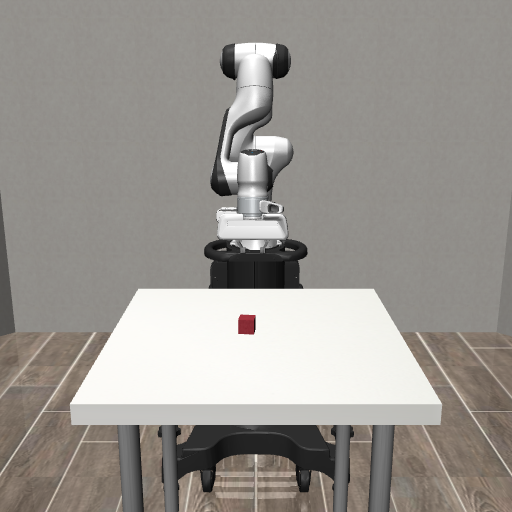

In [20]:
import numpy as np
import robosuite as suite
from robosuite.controllers import load_composite_controller_config
from PIL import Image

# Load controller configuration for Panda robot
controller_config = load_composite_controller_config(robot="Panda")

# Create the Lift environment with Panda arm
env = suite.make(
    env_name="Lift",
    robots="Panda",
    controller_configs=controller_config,
    has_renderer=False,  # Disabled for Mac compatibility
    has_offscreen_renderer=True,  # Enable for image capture
    use_camera_obs=False, 
    control_freq=20,
    horizon=5000,
    camera_names="frontview"  # Specify camera for rendering
)

print("Environment created successfully!")
print(f"Action dimension: {env.action_dim}")
print(f"Action spec (low, high): {env.action_spec}")

# Reset environment
obs = env.reset()
print(f"Reset complete. Observation keys: {list(obs.keys())}")

# Render using sim renderer directly
env.sim.render(camera_name="frontview", height=512, width=512)
frame = env.sim.render(camera_name="frontview", height=512, width=512)
print(f"Rendered frame shape: {frame.shape}")

# Display the frame
display(Image.fromarray(frame).rotate(180))


We can visualize from different angles...

Available cameras: ('frontview', 'birdview', 'agentview', 'sideview', 'robot0_robotview', 'robot0_eye_in_hand')
Frontview:


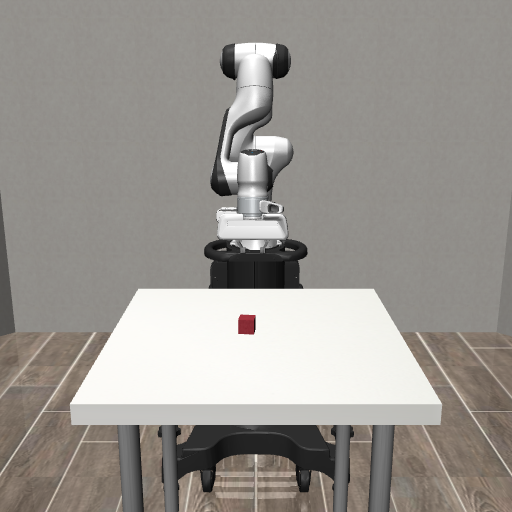

Birdview:


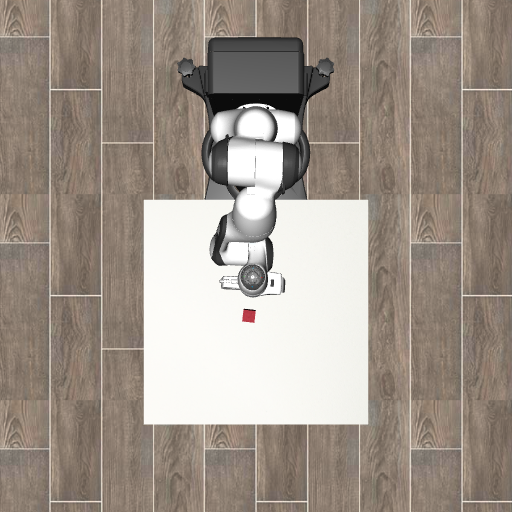

Agentview:


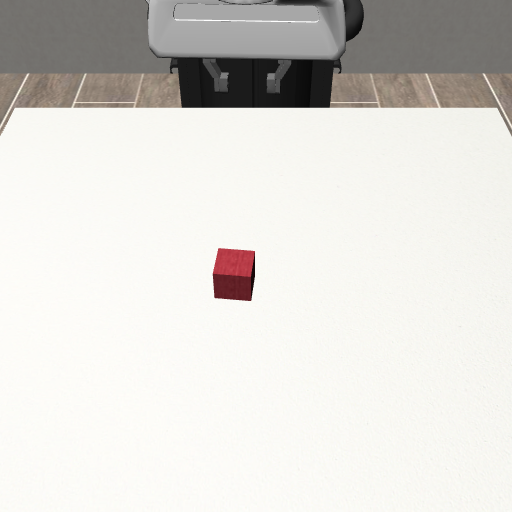

Sideview:


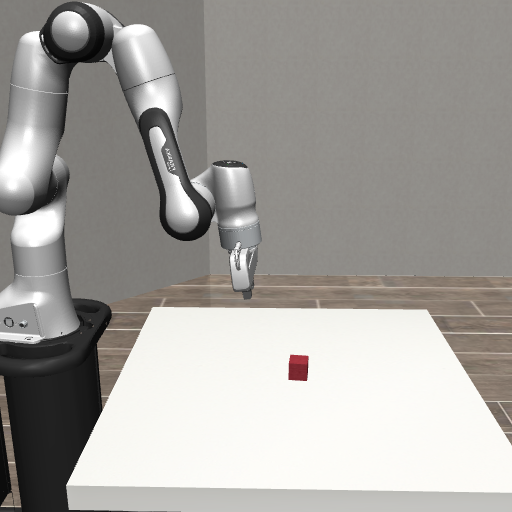

Environment closed.


In [21]:
import numpy as np

# List available cameras
print("Available cameras:", env.sim.model.camera_names)

# Try different camera views
camera_views = ["frontview", "birdview", "agentview", "sideview"]

for cam_name in camera_views:
    if cam_name in env.sim.model.camera_names:
        frame = env.sim.render(camera_name=cam_name, height=512, width=512)
        print(f"{cam_name.capitalize()}:")
        display(Image.fromarray(frame).rotate(180))

env.close()
print("Environment closed.")

We can use different robot models. Here we render `Panda, UR5e, Kinova3`. 

[robosuite INFO] Loading controller configuration from: /opt/anaconda3/envs/robo/lib/python3.10/site-packages/robosuite/controllers/config/robots/default_panda.json (composite_controller_factory.py:121)



Creating environment with robot: Panda
Rendered frame shape for Panda: (512, 512, 3)


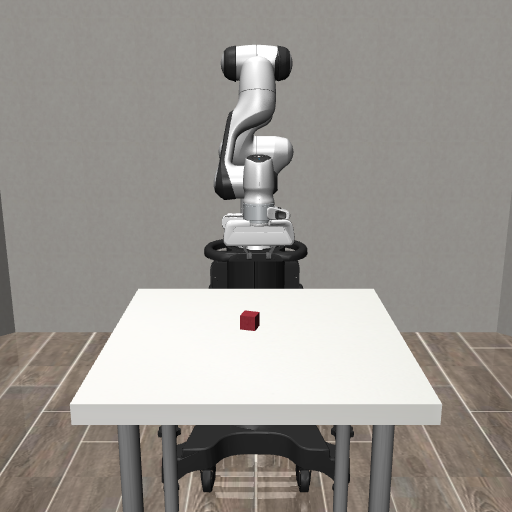

[robosuite INFO] Loading controller configuration from: /opt/anaconda3/envs/robo/lib/python3.10/site-packages/robosuite/controllers/config/robots/default_ur5e.json (composite_controller_factory.py:121)


Environment with Panda closed.

Creating environment with robot: UR5e
Rendered frame shape for UR5e: (512, 512, 3)


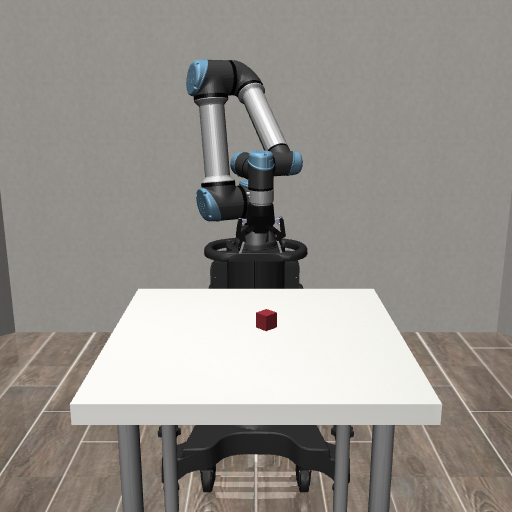

[robosuite INFO] Loading controller configuration from: /opt/anaconda3/envs/robo/lib/python3.10/site-packages/robosuite/controllers/config/robots/default_kinova3.json (composite_controller_factory.py:121)


Environment with UR5e closed.

Creating environment with robot: Kinova3
Rendered frame shape for Kinova3: (512, 512, 3)


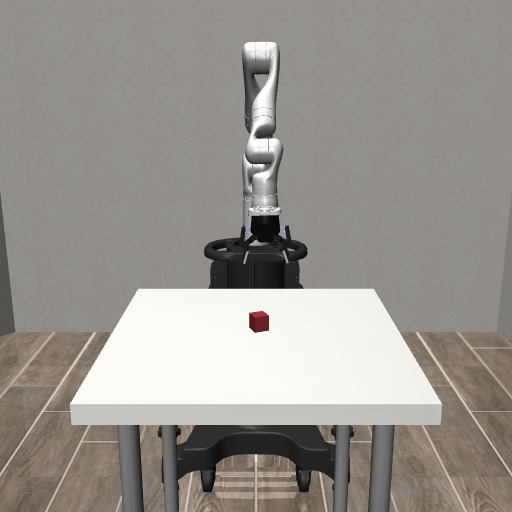

Environment with Kinova3 closed.


In [22]:
robots = ["Panda", "UR5e", "Kinova3"]
for robot in robots:
    print(f"\nCreating environment with robot: {robot}")
    
    controller_config = load_composite_controller_config(robot=robot)
    
    env = suite.make(
        env_name="Lift",
        robots=robot,
        controller_configs=controller_config,
        has_renderer=False,
        has_offscreen_renderer=True,
        use_camera_obs=False,
        horizon=5000,
        camera_names="frontview"
    )
    
    obs = env.reset()
    frame = env.sim.render(camera_name="frontview", height=512, width=512)
    print(f"Rendered frame shape for {robot}: {frame.shape}")
    display(Image.fromarray(frame).rotate(180))
    
    env.close()
    print(f"Environment with {robot} closed.")

Robosuite conveniently has defined around 10 benchmarking tasks. Here we visualize four of them.

[robosuite INFO] Loading controller configuration from: /opt/anaconda3/envs/robo/lib/python3.10/site-packages/robosuite/controllers/config/robots/default_panda.json (composite_controller_factory.py:121)
[robosuite INFO] Loading controller configuration from: /opt/anaconda3/envs/robo/lib/python3.10/site-packages/robosuite/controllers/config/robots/default_panda.json (composite_controller_factory.py:121)



Creating environment for task: Lift
Rendered frame shape for Lift: (512, 512, 3)


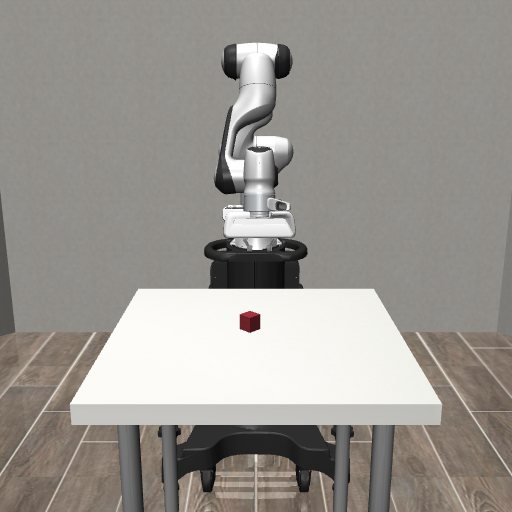

[robosuite INFO] Loading controller configuration from: /opt/anaconda3/envs/robo/lib/python3.10/site-packages/robosuite/controllers/config/robots/default_panda.json (composite_controller_factory.py:121)


Environment for Lift closed.

Creating environment for task: Stack


[robosuite INFO] Loading controller configuration from: /opt/anaconda3/envs/robo/lib/python3.10/site-packages/robosuite/controllers/config/robots/default_panda.json (composite_controller_factory.py:121)


Rendered frame shape for Stack: (512, 512, 3)


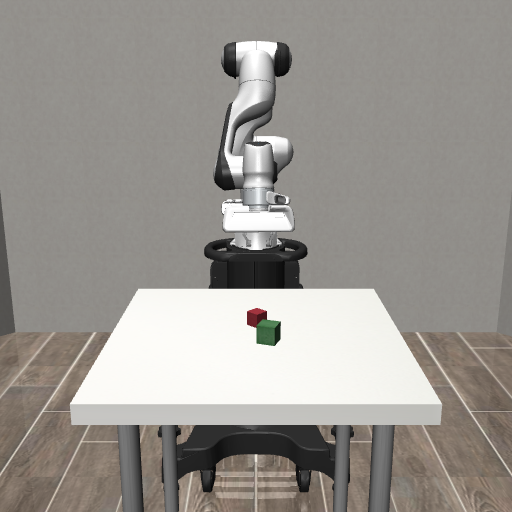

[robosuite INFO] Loading controller configuration from: /opt/anaconda3/envs/robo/lib/python3.10/site-packages/robosuite/controllers/config/robots/default_panda.json (composite_controller_factory.py:121)


Environment for Stack closed.

Creating environment for task: Door


[robosuite INFO] Loading controller configuration from: /opt/anaconda3/envs/robo/lib/python3.10/site-packages/robosuite/controllers/config/robots/default_panda.json (composite_controller_factory.py:121)


Rendered frame shape for Door: (512, 512, 3)


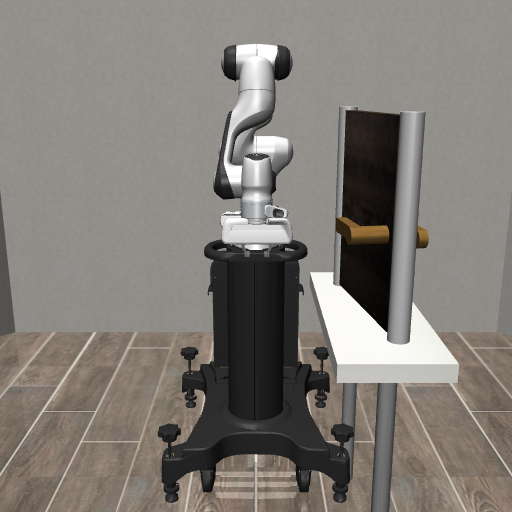

[robosuite INFO] Loading controller configuration from: /opt/anaconda3/envs/robo/lib/python3.10/site-packages/robosuite/controllers/config/robots/default_panda.json (composite_controller_factory.py:121)


Environment for Door closed.

Creating environment for task: NutAssembly


[robosuite INFO] Loading controller configuration from: /opt/anaconda3/envs/robo/lib/python3.10/site-packages/robosuite/controllers/config/robots/default_panda.json (composite_controller_factory.py:121)


Rendered frame shape for NutAssembly: (512, 512, 3)


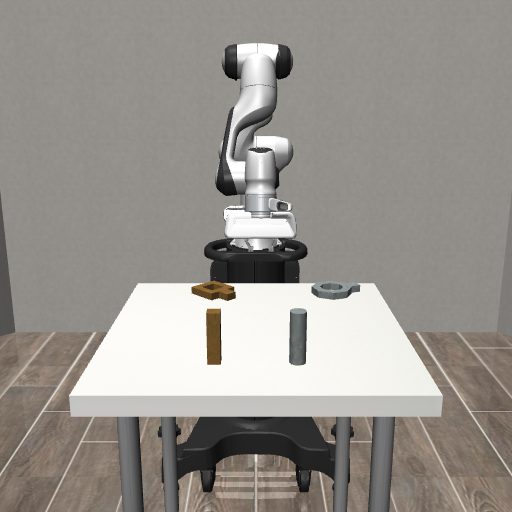

Environment for NutAssembly closed.


In [23]:
benchmark_tasks = ["Lift", "Stack", "Door", "NutAssembly"]

task_info = []

for task in benchmark_tasks:
    print(f"\nCreating environment for task: {task}")

    env = suite.make(
        env_name=task,
        robots="Panda",
        has_renderer=False,
        has_offscreen_renderer=True,
        use_camera_obs=False,
        control_freq=20,
        horizon=5000,
        camera_names="frontview"
    )
    obs = env.reset()
    frame = env.sim.render(camera_name="frontview", height=512, width=512)
    print(f"Rendered frame shape for {task}: {frame.shape}")
    display(Image.fromarray(frame).rotate(180))

    env.close()
    print(f"Environment for {task} closed.")

### Recording Rollouts with a Scripted Policy

Let's implement a simple scripted policy that attempts to complete the Lift task. The policy will:
1. Move towards the cube
2. Descend to grasp height
3. Close the gripper
4. Lift the cube

We'll record the entire episode and save it as a video.

In [24]:
import imageio

# Create a new environment for the scripted policy demo
controller_config = load_composite_controller_config(robot="Panda")

env = suite.make(
    env_name="Lift",
    robots="Panda",
    controller_configs=controller_config,
    has_renderer=False,
    has_offscreen_renderer=True,
    use_camera_obs=False,
    control_freq=20,
    horizon=1000,
    reward_shaping=True,  # Use dense rewards to see progress
)

def lift_policy(obs, phase, step_in_phase):
    """
    A simple scripted policy for the Lift task.
    
    Phases:
    0: Move towards cube (xy)
    1: Descend to cube height
    2: Close gripper
    3: Lift cube
    4: Hold
    """
    # Get robot end-effector position and cube position
    ee_pos = obs["robot0_eef_pos"]  # End-effector position
    cube_pos = obs["cube_pos"]  # Cube position
    
    # Action: [dx, dy, dz, droll, dpitch, dyaw, gripper]
    # For IK controller, this is delta position + gripper
    action = np.zeros(7)
    
    # Proportional control gains
    k_pos = 2.0
    
    if phase == 0:  # Move towards cube in XY
        action[0] = k_pos * (cube_pos[0] - ee_pos[0])  # dx
        action[1] = k_pos * (cube_pos[1] - ee_pos[1])  # dy
        action[2] = k_pos * max(0, (cube_pos[2] + 0.05) - ee_pos[2])  # dz (stay above)
        action[6] = 1  # Keep gripper open
        
    elif phase == 1:  # Descend to grasp height
        action[0] = k_pos * (cube_pos[0] - ee_pos[0])
        action[1] = k_pos * (cube_pos[1] - ee_pos[1])
        action[2] = k_pos * ((cube_pos[2] - 0.01) - ee_pos[2])  # Slightly below cube top
        action[6] = 1  # Keep gripper open
        
    elif phase == 2:  # Close gripper
        action[6] = -1  # Close gripper
        
    elif phase == 3:  # Lift
        action[2] = 0.5  # Move up
        action[6] = -1  # Keep gripper closed
        
    else:  # Hold
        action[2] = 0.0
        action[6] = -1  # Keep gripper closed
    
    # Clip actions to valid range
    low, high = env.action_spec
    action = np.clip(action, low, high)
    
    return action

# Run the scripted policy and record
obs = env.reset()
frames = []
total_reward = 0.0

# State machine for phases
phase = 0
steps_in_phase = 0
phase_durations = [100, 100, 100, 100, 100]  # Steps for each phase, total = 500

print("Starting scripted policy rollout...")

for step in range(500):
    # Get action from scripted policy
    action = lift_policy(obs, phase, steps_in_phase)
    
    # Step environment
    obs, reward, done, info = env.step(action)
    total_reward += reward
    
    # Render and store frame
    frame = env.sim.render(camera_name="frontview", height=512, width=512)
    rotated_frame = np.rot90(frame, k=2)  # Rotate 180 degrees
    frames.append(rotated_frame)

    # Update phase
    steps_in_phase += 1
    if steps_in_phase >= phase_durations[phase] and phase < len(phase_durations) - 1:
        phase += 1
        steps_in_phase = 0
        print(f"Step {step}: Moving to phase {phase}")
    
    if done:
        print(f"Episode finished at step {step}")
        break

print(f"Total reward: {total_reward:.3f}")
print(f"Recorded {len(frames)} frames")

# Save as video
video_path = "media/lift_rollout.mp4"
imageio.mimsave(video_path, frames, fps=20)
print(f"Video saved to {video_path}")

env.close()
print("Environment closed.")

[robosuite INFO] Loading controller configuration from: /opt/anaconda3/envs/robo/lib/python3.10/site-packages/robosuite/controllers/config/robots/default_panda.json (composite_controller_factory.py:121)


Starting scripted policy rollout...
Step 99: Moving to phase 1
Step 199: Moving to phase 2
Step 299: Moving to phase 3
Step 399: Moving to phase 4
Total reward: 57.793
Recorded 500 frames
Video saved to media/lift_rollout.mp4
Environment closed.


### Key Limitations and Conclusion
* **MuJoCo-only core**: There is a clean manipulation and customization stack, however it's tied to MuJoCo's API. If you wish to use a different simulator, you will need to manually add a porting connection. 
* **Scope is manipulation centric**: The main manipulation tasks and robots are robot arms for table top tasks. There is little coverage of for more mobile tasks / navigation tasks out of the box. You would have to customize this yourself. 

Robosuite ultimately serves as a lightweight MuJoCo centered simulation and testing framework that is good for fast iteration of ideas. It is the go to option for academia where you are often testing more simple algorithmic changes on custom tasks rather than industry grade sim2real transfer and generalized humanoid tasks. Majority of academic papers use Robosuite code and corresponding datasets i.e. LIBERO dataset is built on top of Robosuite. 

There are a lot more features to Robosuite that I have not covered. Refer to their [documentation](https://robosuite.ai/docs/index.html) for more details. 

## Getting Started with Roboverse

### Background

**RoboVerse** is a 2025 open-source platform and benchmark that unifies robot learning under a single ecosystem. It was developed by a multi-institution team including UC Berkeley and Peking University to address the fragmentation of robot simulation environments. Built around **MetaSim**, a simulator-agnostic interface supporting MuJoCo, SAPIEN, PyBullet, and others, RoboVerse allows researchers to run the same task or policy across different physics engines and robot embodiments. Note the key difference between RoboSuite which is built purely on MuJoCo and RoboVerse which promises a simulator-agnostic framework. Its infrastructure standardizes environment APIs, assets, and evaluation, aiming to do for robotics what ImageNet and GLUE did for vision and language.

At its core, RoboVerse provides a **large-scale synthetic dataset**—millions of transitions across over a thousand manipulation tasks—and **benchmarks for imitation and reinforcement learning** with consistent evaluation protocols. This enables scalable experiments on policy generalization, embodiment transfer, and sim-to-real adaptation. The platform merges ideas from prior systems like RoboSuite and RLBench but extends them into a broader, interoperable framework designed for reproducibility and scalability.

The project’s broader **vision** is to accelerate progress toward general-purpose robot intelligence by creating a shared foundation for data, simulation, and evaluation. RoboVerse aims to make robot learning more like modern AI research—large, collaborative, and benchmark-driven—while staying grounded in physical realism. Though real-world transfer remains challenging, RoboVerse sets the stage for developing and testing generalist robotic agents capable of operating across diverse tasks, embodiments, and simulators.

### Installation
**Prerequisites**
* Python 3.10 recommended
* `uv` pacakge manager for dependency management
* Choose a simulator backend (we'll use MuJoCo) since it's already installed

**Note**: RoboVerse is designed for Linux (Ubuntu 22.04 recommended). macOS support may be limited depending on the backend simulator. 

In [25]:
# Install uv pacakage manager

%pip install --quiet uv

# Clone RoboVerse repository
!git clone https://github.com/RoboVerseOrg/RoboVerse.git
%cd RoboVerse

#Install with MuJoCo backend
!uv pip --quiet install -e ".[mujoco]" # if you did not install earlier

Note: you may need to restart the kernel to use updated packages.
Cloning into 'RoboVerse'...
remote: Enumerating objects: 20031, done.
remote: Counting objects: 100% (5006/5006), done.
remote: Compressing objects: 100% (738/738), done.
remote: Total 20031 (delta 4568), reused 4278 (delta 4268), pack-reused 15025 (from 2)
Receiving objects: 100% (20031/20031), 380.65 MiB | 14.11 MiB/s, done.
Resolving deltas: 100% (12712/12712), done.
/Users/jwei302/Dev/full-stack-ai/MWEs/Robotics/lerobot/RoboVerse


/opt/anaconda3/envs/robo/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


Verifying installation...

In [26]:
import metasim
print(f"Successfully imported metasim")

Successfully imported metasim


### Basics

RoboVerse uses a **configuration-based** approach where environments are defined using Python configuration objects. The key abstraction is:

1. **ScenarioCfg**: Defines robots, objects, cameras, and simulator backend
2. **get_handler()**: Creates a simulator handler from the scenario
3. **handler.set_states()**: Set initial states
4. **handler.get_states()**: Get observations

Let's create a simple scene with a Franka robot and some objects.

In [ ]:
import torch
import imageio
from metasim.scenario.scenario import ScenarioCfg
from metasim.scenario.cameras import PinholeCameraCfg
from metasim.scenario.objects import (
    PrimitiveCubeCfg,
    PrimitiveSphereCfg
)
from metasim.constants import PhysicStateType, SimType
from metasim.utils.setup_util import get_handler

# Create scenario configuration

scenario = ScenarioCfg(
    robots=["franka"], # Franka Panda robot
    simulator="mujoco", # Use MuJoCo backend
    headless=True, # No GUI
    num_envs=1, # Single environment
)

# Add a camera
scenario.cameras = [
    PinholeCameraCfg(
        name="main_camera",
        pos=(1.5, -1.5, 1.5), # camera position
        look_at=[0.0, 0.0, 0.0], # look at origin
        width=640,
        height=480,
    )
]

scenario.objects = [
    PrimitiveCubeCfg(
        name="cube",
        size=(0.1, 0.1, 0.1),
        color=(1.0, 0.0, 0.0),
        physics=PhysicStateType.RIGIDBODY,
    ),
    PrimitiveSphereCfg(
        name="sphere",
        radius=0.3,
        color=(0.0, 0.0, 1.0),
        physics=PhysicStateType.RIGIDBODY,
    )
]

handler = get_handler(scenario)
init_states = [
    {
        "objects": {
            "cube": {
                "pos": torch.tensor([0.3, -0.2, 0.05]), # position
                "rot": torch.tensor([1.0, 0.0, 0.0, 0.0]) # rotation quaternion
            },
            "sphere": {
                "pos": torch.tensor([0.4, -0.6, 0.05]), 
                "rot": torch.tensor([1.0, 0.0, 0.0, 0.0])
            }
        },
        "robots": {
            "franka": {
                "pos": torch.tensor([[0.0, 0.0, 0.0]]),
                "rot": torch.tensor([1.0, 0.0, 0.0, 0.0])
            },
            "dof_pos": {
                "panda_joint1": 0.0,
                "panda_joint2": -0.5,
                "panda_joint3": 0.0,
                "panda_joint4": -2.0,
                "panda_joint5": 0.0,
                "panda_joint6": 1.0,
                "panda_joint7": 0.5,
                "panda_finger_joint1": 0.04,
                "panda_finger_joint2": 0.04
            }
        }
    }
]

handler.set_states(init_states)

obs_tensor = handler.get_states(mode="tensor")
display(Image.fromarray(obs_tensor["cameras"]["main_camera"][0].numpy()))

### Multi-Simulator Comparison

One of RoboVerse's key advantages is **simulator-agnostic execution**. The same scene configuration can run on different physics engines by simply changing the `simulator` parameter. Let's test this by comparing MuJoCo and Sapien.

In [ ]:
!uv --quiet pip install -e ".[sapien]"

In [ ]:
simulators = ["mujoco", "sapien"]

for sim in simulators:
    print(f"\nTesting simulator: {sim}")
    
    scenario.simulator = sim
    handler = get_handler(scenario)
    handler.set_states(init_states)
    
    obs_tensor = handler.get_states(mode="tensor")
    save_path = f"../media/roboverse_scene_{sim}.png"
    print(f"Saving scene image to {save_path}...")
    imageio.imwrite(save_path, next(iter(obs_tensor.cameras.values())).rgb[0].cpu().numpy())

### Key Limitations and Conclusions
* **Still in development**. The MetaSim is powerful but new. Their release notes flags that many parts are still under "active development". You will encounter a lot more bugs compared to Robosuite's more simply MuJoCo stack. This also means there are a lot less third-party tutorials from the robotics OSS community. 

RoboVerse serves as an exciting prospect to unify different types of simulators into a unified robotic learning stack. It also provides an accompanying large RoboVerse dataset that allows for scaled up training. However, because of how new it is, I would expect a year or so for the codebase to mature and exhibit less bugs. 

## Getting Started with LeRobot

**LeRobot** is Hugging Face's open-source stack for **real-world robot learning** in PyTorch, bundling **models, datasets, and tooling** so labs can train, evaluate, and share policies with minimal glue code. The core aim is to **lower the barriers** to data collection and policy training, standardize formats, and make results **reproducible and shareable on the Hub**—especially for imitation learning (IL) and reinforcement learning (RL).

It was initially released in 2024 with end-to-end IL / RL examples and HF integration. In 2025, it released a standardized, scaled up *LeRobotDataset*. Later, it added a robot learning tutorial and integrated **π0/π0-FAST** and **SmolVLA** into its ecosystem. 

### What LeRobot Excels At

LeRobot is particularly strong in several key areas that distinguish it from simulation-focused frameworks:

1. **Hub-Native Workflow**: Seamless integration with Hugging Face Hub enables one-command dataset uploads/downloads, model versioning, and collaborative sharing. This brings the "push-to-hub" paradigm of modern ML to robotics, making reproducibility trivial.

2. **Real Robot Support**: Unlike pure simulation frameworks, LeRobot prioritizes **real-world deployment** with built-in support for popular hardware (cameras, robot arms, ALOHA setups) and utilities for recording trajectories directly from physical robots.

3. **Dataset Streaming & Scalability**: The **LeRobotDataset v3** format supports streaming large datasets without downloading gigabytes upfront, enabling training on massive corpora (e.g., DROID, Open X-Embodiment) that would be impractical to store locally.

4. **Modern Vision-Language Integration**: First-class support for **π0/π0-FAST** (scaling laws for robot policies) and **SmolVLA** (vision-language-action models) reflects its focus on cutting-edge generalist policies that leverage internet-scale pretraining.

5. **Low Barrier to Imitation Learning**: Pre-built pipelines for behavior cloning and diffusion policies (ACT, Diffusion Policy) with standardized data loaders mean researchers can go from dataset to trained policy in a few lines of code.

6. **Ecosystem Interoperability**: Utilities to convert existing datasets (RLBench, DROID), **Foxglove** visualization for debugging trajectories, and **Dora** pipelines for sensor fusion make it easy to integrate with the broader robotics stack.

LeRobot is the go-to choice for labs working on **real-robot learning at scale**, cross-embodiment generalization, or leveraging large pretrained models—areas where Hub integration, data management, and modern architectures matter more than simulation fidelity.

### Core Components
- **Models & Training Pipelines:** Reference IL/RL implementations with processors that define input/output transforms (vision stacks, action heads) for consistent training/inference.
- **LeRobotDataset v3:** A hub-native dataset spec for robot trajectories (obs/actions, camera frames, proprio, timestamps), with **streaming** to bypass full downloads and utilities to **record on real robots** and push to the Hub. 
- **Integrations:** How-tos for porting existing datasets (RLBench, DROID), **Foxglove** visualization, and **Dora** pipelines for wiring cameras/sensors/arms.  
- **Ecosystem:** Central docs + GitHub with recipes, install extras (e.g., `pi`, `libero`) for specific research stacks. 

### Installation

**Prerequisites**
* Python 3.10+
* PyTorch 2.0+
* For simulation: gymnasium environments
* For real robots: camera drivers, robot SDK

LeRobot offers different installation profiles depending on your use case.

In [27]:
# Install LeRobot with basic dependencies
%pip install --quiet lerobot matplotlib 

%pip install --quiet "huggingface-hub[cli,hf-transfer]>=0.34.2,<0.36.0"

# Optional: Install with specific extras
# %pip install lerobot[pi]      # For Pi0/Pi0-FAST models
# %pip install lerobot[smolvla]  # For SmolVLA models
# %pip install lerobot[aloha]    # For ALOHA robot support

print("LeRobot installed successfully!")

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
LeRobot installed successfully!


Verify the installation...

In [28]:
import lerobot, huggingface_hub
print(f"LeRobot version: {lerobot.__version__}")
print(f"Hugging Face Hub version: {huggingface_hub.__version__}")

LeRobot version: 0.4.0
Hugging Face Hub version: 0.35.3


### Exploring LeRobot Datasets

LeRobot provides access to many robot learning datasets through the Hugging Face Hub. Let's explore the popular **PushT** dataset - a 2D pushing task where a T-shaped block must be pushed to a target pose.

In [29]:
from lerobot.datasets.lerobot_dataset import LeRobotDataset
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Load PushT dataset from Hugging Face Hub
# This will stream data without downloading the entire dataset
dataset = LeRobotDataset(
    repo_id="lerobot/pusht",
    episodes=[0, 10, 11, 23]
)
 
print(f"Dataset: {dataset.repo_id}")
print(f"Number of episodes: {dataset.num_episodes}")
print(f"Number of frames: {dataset.num_frames}")
print(f"Frames per second: {dataset.fps}")
print(f"\nFeatures:")
for key in dataset.features:
    print(f"  - {key}: {dataset.features[key]}")

Dataset: lerobot/pusht
Number of episodes: 4
Number of frames: 25650
Frames per second: 10

Features:
  - observation.image: {'dtype': 'video', 'shape': (96, 96, 3), 'names': ['height', 'width', 'channel'], 'video_info': {'video.fps': 10.0, 'video.codec': 'av1', 'video.pix_fmt': 'yuv420p', 'video.is_depth_map': False, 'has_audio': False}}
  - observation.state: {'dtype': 'float32', 'shape': (2,), 'names': {'motors': ['motor_0', 'motor_1']}, 'fps': 10.0}
  - action: {'dtype': 'float32', 'shape': (2,), 'names': {'motors': ['motor_0', 'motor_1']}, 'fps': 10.0}
  - episode_index: {'dtype': 'int64', 'shape': (1,), 'names': None, 'fps': 10.0}
  - frame_index: {'dtype': 'int64', 'shape': (1,), 'names': None, 'fps': 10.0}
  - timestamp: {'dtype': 'float32', 'shape': (1,), 'names': None, 'fps': 10.0}
  - next.reward: {'dtype': 'float32', 'shape': (1,), 'names': None, 'fps': 10.0}
  - next.done: {'dtype': 'bool', 'shape': (1,), 'names': None, 'fps': 10.0}
  - next.success: {'dtype': 'bool', 'sha

### Key Limitations and Conclusion

**Key Limitations:**
* **Maturity & Documentation**: Released in 2024, LeRobot is still maturing compared to established frameworks like Robosuite (2017). Documentation can be sparse for edge cases, and breaking changes may occur as the ecosystem evolves.
* **Simulation Coverage**: While LeRobot supports Gymnasium environments, it lacks the rich task library and domain-specific simulation tools of frameworks like Robosuite or Isaac Sim. It's designed for real-robot workflows, not exhaustive sim-only research.
* **Hardware Setup Complexity**: Real-robot support is a strength, but getting cameras, arms, and sensors working together requires significant hardware expertise and debugging—far more complex than spinning up a MuJoCo simulation.
* **Smaller Task Benchmarks**: Unlike RoboVerse (1000+ tasks) or LIBERO, LeRobot's included tasks are limited. Researchers often bring external datasets or record their own, which adds upfront effort.
* **Community Size**: While growing rapidly, LeRobot's community is smaller than PyTorch Robotics or OpenAI Gym ecosystems, meaning fewer third-party tutorials, extensions, and Stack Overflow answers.

**Conclusion:**

LeRobot ultimately serves as **Hugging Face's bridge from AI/ML workflows to robotics**, bringing the Hub's collaborative infrastructure to robot learning. Its sweet spot is **data-centric imitation learning** at scale—labs collecting real-robot trajectories, training diffusion policies or VLAs, and sharing results for reproducibility. The framework excels when your bottleneck is dataset management, model sharing, or integrating pretrained vision-language models, rather than designing custom simulators or control algorithms.

For pure simulation research (e.g., testing RL algorithms on standardized manipulation tasks), **Robosuite** remains more mature and feature-complete. For multi-simulator flexibility and large synthetic datasets, **RoboVerse** is more appropriate. But if you're working with **real robots**, aiming for **cross-embodiment generalization**, or leveraging **internet-scale pretraining** (π0, SmolVLA), LeRobot's Hub-native design and modern architecture support make it the pragmatic choice.

As the framework matures and the community grows, expect LeRobot to become the de facto standard for labs prioritizing **reproducible, shareable, and scalable real-robot learning**—essentially doing for robotics what Hugging Face Transformers did for NLP.